<a href="https://colab.research.google.com/github/Buddhikagayan99/E-19-022/blob/main/mechanics/assignments/ME421_ControlSystems_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instructions

* This is a group assignment. Complete the activities in groups that were assigned for ME421 for the vibrations lab.

* Make a copy of this and save it in your group github group repository.

* Do all your work, EXCLUSIVELY, in that saved notebook. Your github commits will serve as a refelection of your individual contributions. It will constitute 25% of your final grade for the lab.

* Complete Tasks#1 and Task#2 by 5:00PM on 18/01/2024

* Complete Tasks#3 and the Task#4 by 5:00PM on 25/01/2024 and demonstrate the work in the class on 01/02/2024.

* Complete Task#5 by 5:00PM on 08/02/2024 and submit the link to your working repository by midnight 08/02/2024.

#References

* https://colab.research.google.com/github/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/Mugas_Rigid_Body_Control.ipynb

* https://github.com/mugalan/classical-mechanics-from-a-geometric-point-of-view/blob/main/rigid-body-control/MaithriPalaDHS_RigidBodyPIDControl_IITB_18_03_2023.pdf

#Task#1

Conside a rigid body moving in space. Let $\mathbf{b}$ be a body fixed frame with the origin coinciding with that of the center of mass of the body, $M$ be the tatal mass of the body, $\mathbb{I}$ be the inertia tensor of the body with respect to the body frame $\mathbf{b}$, $f^e$ be the resultant total external interactions acting on the particles of the body, and $\tau^e$ be the total resultant of the moments of the external interactions about the center of mass of the body.

Show that a general rigid body is descibed by the following simple equations in an inertial frame $\mathbf{e}$ where the moments are taken about the center of mass of the rigid body.

\begin{align}
\dot{o}&=\frac{1}{M}p\\
\dot{R}&=\widehat{\omega}R,\\
\dot{p}&=f^e+f^u,\\
\dot{\pi}&=\tau^e+\tau^u,
\end{align}
where
\begin{align}
\omega &=(\mathbb{I}_c^R)^{-1}\pi,
\end{align}
Here we have split the force and control moments into unmanipulatable and manipulatable (control) part. The manipulatable (control) part will be denoted by a superscript $u$.

Let $\mathbf{e}$ be an inertial frame with origin $O$ and and let $\mathbf{b}(t)$ be an ortho-normal frame with origin $O'$ in which all the particles $P_i$ appear to be fixed as illustrated for example in the figure above. We will call $\mathbf{b}(t)$ the body frame. Let $OO'=\mathbf{e}o(t)$. The position of the $i^\mathrm{th}$ point $P_i$ at a time $t$, is given by $x_i(t)$ with respect to the frame $\mathbf{e}$ and by $X_i$
with respect to the body frame $\mathbf{b}(t)$. Observe that since all points on the body appear to be fixed with respect to the body frame $\mathbf{b}(t)$, the representation $X_i$ is independent of time. Therefore specifying $\mathbf{b}(t)$ amounts to specifying the configuration
of the rigid body. Since $\mathbf{b}(t)$ is uniquely related to the inertial frame $\mathbf{e}$ by the rotational matrix $R(t)$, where $\mathbf{b}(t)=\mathbf{e}\,R(t)$, and the position of its origin $o(t)$, the specification of $(o(t),R(t))$ amounts to the unique specification of the configuration of the rigid body with respect to the inertial frame $\mathbf{e}$. Similarly any $(o,R)$ where $o\in \mathbb{R}^3$ and $R\in \mathrm{SO}(3)$ defines a unique configuration of the rigid body. Thus the configuration space of rigid body motion is $ \mathbb{R}^3\times \mathrm{SO}(3)$ where we have denoted the space of $3\times 3$ special orthogonal matrices by $\mathrm{SO}(3)$.

The pair $(o,R)\in \mathbb{R}^3 \times \mathrm{SO}(3)$ can also be identified with a unique $4\times 4$ matrix
\begin{align}
E&=\begin{bmatrix}
R & o \\ 0 & 1\end{bmatrix}.
\end{align}
The spcace of all such $4\times 4$ matrices are referred to as the space of special euclidean group of matrices that is denote by $SE(3)$.

Recall that the quantity $\Omega$ where $\widehat{\Omega}=R^T\dot{R}$ corresponds to an instantaneous rotation of the body about the axis $\Omega$ as expressed in the body frame $\mathbf{b}$ by an
amount equal to the magnitude $||\Omega||$ and thus that $\Omega$ can be defined to be the **body angular velocity** of the rigid body. The $\mathbf{e}$ frame version of this quantity $\omega \triangleq R\Omega$ is defined to be the **spatial angular velocity** of the rigid body.

The equation
\begin{align}
\dot{R}&=R\widehat{\Omega}
\end{align}
that defines angular velocity is usually referred to as the **rigidbody kinematic** equations.

Since $\widehat{\Omega}=\widehat{R^T\omega}=R^T\widehat{\omega}R$ this can also be equivalently written down as
\begin{align}
\dot{R}&=\widehat{\omega}R.
\end{align}


the total linear momentum of a set of particles can be written down as
\begin{align}
p&=\sum_{i}p_i=\sum_{i}m_i\left(\dot{o}+R(\widehat{\Omega}{X}_i+\dot{X}_i)\right).
\end{align}
In the case of a rigid body $\dot{X}_i=0_{3\times 1}$ and hence
\begin{align}
p&=M(\dot{o}+R\widehat{\Omega}\bar{X})=M(\dot{o}+\widehat{\omega}R\bar{X})=M\dot{\bar{x}},
\end{align}
where $M=\sum_{i}m_i$, $\bar{X}=\sum_{i}m_i X_i/\sum_{i}m_i$ is the center of mass of the rigid body represented with repect to frame $\mathbf{b}$ fixed to the body (body frame).

Thus we also see that that the translational kinematics are given by
\begin{align}
\dot{o}&=\frac{1}{M}p-\omega \times R\bar{X}.
\end{align}

To show that:

\begin{equation}
\dot{o} = \frac{1}{M} p,
\end{equation}

we need to demonstrate that the term $(\omega \times R\bar{X})$ vanishes.

If we assume that the reference point is chosen such that $ R\bar{X} = 0 \$, meaning that the position of the center of mass is used as the reference, then:

\begin{equation}
\omega \times R\bar{X} = 0.
\end{equation}

Substituting this into the original equation:

\begin{equation}
\dot{o} = \frac{1}{M} p - 0 = \frac{1}{M} p.
\end{equation}

Thus, we have derived the desired result.



Also recall that angular momentum of a point particle of mass $m_i$ about the origin $O'$ of a $\mathbf{b}$ frame takes the form
\begin{align}
\pi_i&= R\left(\mathbb{I}_i\Omega+m_iX_i\times( R^T\dot{o}+ \dot{X}_i)\right),
\end{align}
in the $\mathbf{e}$ frame and
\begin{align}
\Pi_i= \left(\mathbb{I}_i\Omega+m_iX_i\times(\dot{X}_i+ R^T\dot{o})\right),
\end{align}
in the $\mathbf{b}$ frame where the quantity
\begin{align}
\mathbb{I}_i &\triangleq -m_i\widehat{X}_i^2=m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right),
\end{align}
is defined as the *moment of inertia* of the particle $P_i$ about the point $O'$ in the frame $\mathbf{b}$.

Since in a rigid body the particles are fixed with respect to the frame $\mathbf{b}$ we have that $\dot{X}_i=0_{3\times 1}$ and then we have
\begin{align}
\pi_i&= R\underbrace{\left(\mathbb{I}_i\Omega+m_iX_i\times R^T\dot{o}\right)}_{\Pi_i},
\end{align}
Summing them over all the particles we have that the total angulare momentum about $O'$ is given by
\begin{align}
\pi&=\sum_{i}\pi_i= R\underbrace{\left(\mathbb{I}\Omega+M\bar{X}\times R^T\dot{o}\right)}_{\Pi},
\end{align}
where $M=\sum_{i}m_i$, $\bar{X}=\sum_{i}m_i X_i/\sum_{i}m_i$ is the representation of the center of mass of the rigid body in the $\mathbf{b}$ frame, and
\begin{align}
\mathbb{I} &\triangleq \sum_{i}-m_i\widehat{X}_i^2=\sum_{i}m_i\left(||X_i||^2I_{3\times 3} - X_iX_i^T\right),
\end{align}
is defined as the *moment of inertia* of the body about the point $O'$ in the frame $\mathbf{b}$. It is easy to see that this is a symmetric positive definite matrix if all the ponts are not co-linear.

Since $p=M\dot{\bar{x}}=M(\dot{o}+R(\Omega\times \bar{X}))$ we see that $M\dot{o}\times \dot{\bar{x}}=\dot{o}\times p=-R(\Omega \times \bar{X})\times p$ we also see that
\begin{align}
\pi&=R\left(\mathbb{I}\Omega +M\bar{X}\times R^T\left(\frac{1}{M}p-R(\Omega\times \bar{X})\right)\right)\\
&=R\left(\mathbb{I}\Omega +\bar{X}\times R^Tp+M\bar{X}\times \bar{X} \times\Omega\right)\\
&=R\left((\mathbb{I}+M\widehat{\bar{X}}^2)\Omega +\bar{X}\times R^Tp)\right)\\
&=R\left(\mathbb{I}_c\Omega +\bar{X}\times R^Tp)\right).
\end{align}
where
\begin{align*}
\mathbb{I}_c&\triangleq \mathbb{I}+M\widehat{\bar{X}}^2
\end{align*}
is the inertia tensor of the body with respect to a frame that is parallel to $\mathbf{b}$ and origin coinciding with the center of mass of the object, $O_c$.



*When written as
\begin{align}
\mathbb{I}&=\mathbb{I}_c-M\widehat{\bar{X}}^2
\end{align}
this turns out to be the parallel axis theorem.*

Also note that since $\Omega =R^T\omega$ we have
\begin{align}
\pi&=R\left(\mathbb{I}_c\Omega +\bar{X}\times R^Tp)\right),\\
&=(R\mathbb{I}_cR^T)\omega +R\bar{X}\times p,\\
&=\mathbb{I}_c^R\omega +R\bar{X}\times p.
\end{align}
where
\begin{align}
\mathbb{I}_c^R\triangleq R\mathbb{I}_cR^T=R(\mathbb{I}+M\widehat{\bar{X}}^2)R^T,
\end{align}
is defined to be the *locked inertia tensor* in the body. It can be shown that $\mathbb{I}_c^R$ is the moment of inertia tensor of the body with respect to a frame that is parallel to $\mathbf{e}$ and  orign coinciding with the center of

#Task#2

Simulate the motion of a quadrotor UAV without resorting any parameterization of $SO(3)$ such as Euler angles or quaternions.

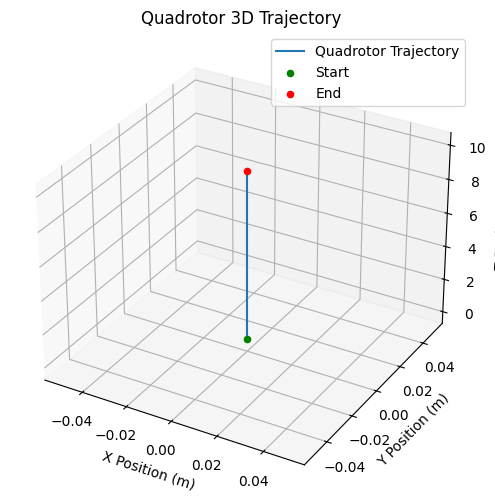

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Define the quadrotor parameters
M = 1.0  # Mass of the UAV (kg)
I = np.diag([0.02, 0.02, 0.04])  # Inertia matrix (kg*m^2)
g = 9.81  # Gravity (m/s^2)

# Skew-symmetric operator for cross product
def hat(v):
    return np.array([[0, -v[2], v[1]],
                     [v[2], 0, -v[0]],
                     [-v[1], v[0], 0]])

# Equations of motion
def quadrotor_dynamics(t, state):
    R = state[:9].reshape(3, 3)  # Rotation matrix
    p = state[9:12]  # Linear momentum
    pi = state[12:15]  # Angular momentum

    # Compute linear and angular velocities
    v = p / M  # Linear velocity
    omega = np.linalg.inv(I) @ pi  # Angular velocity

    # Define control forces and torques (simple thrust model)
    thrust = np.array([0, 0, M * (g + 2)])  # Additional upward force
    tau_u = np.array([0.01, -0.01, 0])  # Small torques for rotation

    # Compute derivatives
    dRdt = R @ hat(omega)  # SO(3) kinematics
    dpdt = thrust - np.array([0, 0, M * g])  # Net force (lifting the quadrotor)
    dpidt = tau_u  # Euler's rotational equation

    return np.hstack([dRdt.flatten(), dpdt, dpidt])

# Initial conditions
R0 = np.eye(3).flatten()  # Initial rotation is identity matrix
p0 = np.array([0, 0, 0])  # Initial linear momentum
pi0 = np.array([0.1, -0.1, 0])  # Small initial angular momentum for rotation
state0 = np.hstack([R0, p0, pi0])

# Time span
tspan = (0, 5)  # Simulate for 5 seconds
t_eval = np.linspace(tspan[0], tspan[1], 100)

# Solve the equations of motion
sol = solve_ivp(quadrotor_dynamics, tspan, state0, t_eval=t_eval, method='RK45')

# Extract position data
position = sol.y[9:12, :].T

# Plot results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(position[:, 0], position[:, 1], position[:, 2], label='Quadrotor Trajectory')
ax.scatter(position[0, 0], position[0, 1], position[0, 2], color='g', label='Start')
ax.scatter(position[-1, 0], position[-1, 1], position[-1, 2], color='r', label='End')
ax.set_xlabel('X Position (m)')
ax.set_ylabel('Y Position (m)')
ax.set_zlabel('Z Position (m)')
ax.set_title('Quadrotor 3D Trajectory')
ax.legend()
plt.show()

#Task#3

Deerive a PID controller for the attitude control of a quadrorotor and use simulations to demibstrate the very large region of stability of the controller

Here are few example our own implementations of this controller.

* https://youtu.be/6E9WDQNVSYA
* https://youtu.be/uUKxXImRMOA
* https://youtu.be/zq05N8m_9SA
* https://youtu.be/J5dThZGZN2g
* https://youtu.be/J5MMp6Be3tU
* https://youtu.be/6ZQgE1FI6Wc

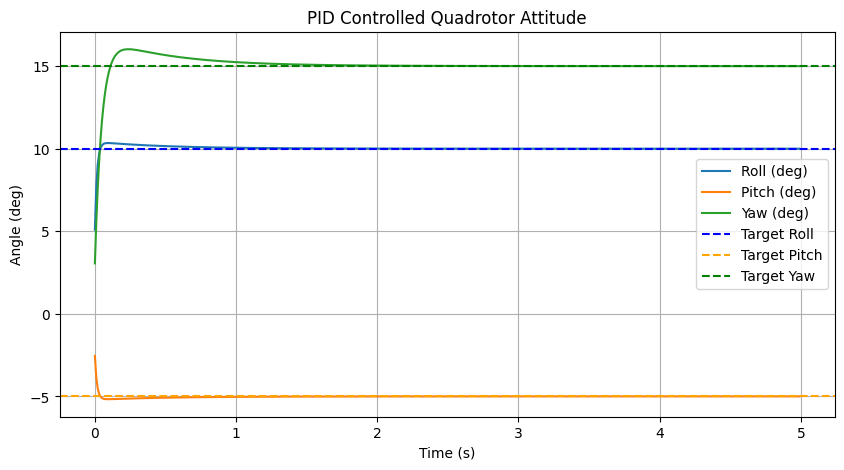

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd, dt):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.integral = 0
        self.previous_error = 0

    def compute(self, error):
        self.integral += error * self.dt
        derivative = (error - self.previous_error) / self.dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.previous_error = error
        return output

class Quadrotor:
    def __init__(self, dt=0.01):
        self.dt = dt
        self.angle = np.array([0.0, 0.0, 0.0])  # [roll, pitch, yaw]
        self.angular_velocity = np.array([0.0, 0.0, 0.0])

    def update(self, torque):
        moment_of_inertia = np.array([0.02, 0.02, 0.04])  # Approximate values
        angular_acceleration = torque / moment_of_inertia
        self.angular_velocity += angular_acceleration * self.dt
        self.angle += self.angular_velocity * self.dt

# Simulation parameters
dt = 0.01  # Time step
time = np.arange(0, 5, dt)  # 5 seconds simulation

# PID controllers for roll, pitch, and yaw
pid_roll = PIDController(Kp=2.0, Ki=0.1, Kd=1.0, dt=dt)
pid_pitch = PIDController(Kp=2.0, Ki=0.1, Kd=1.0, dt=dt)
pid_yaw = PIDController(Kp=1.5, Ki=0.05, Kd=0.8, dt=dt)

quadrotor = Quadrotor(dt)

# Desired angles (setpoints)
desired_angle = np.array([10.0, -5.0, 15.0])  # [roll, pitch, yaw]

# Data storage
angles = []
for t in time:
    error = desired_angle - quadrotor.angle
    torque = np.array([
        pid_roll.compute(error[0]),
        pid_pitch.compute(error[1]),
        pid_yaw.compute(error[2])
    ])
    quadrotor.update(torque)
    angles.append(quadrotor.angle.copy())

angles = np.array(angles)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, angles[:, 0], label='Roll (deg)')
plt.plot(time, angles[:, 1], label='Pitch (deg)')
plt.plot(time, angles[:, 2], label='Yaw (deg)')
plt.axhline(desired_angle[0], linestyle='--', color='blue', label='Target Roll')
plt.axhline(desired_angle[1], linestyle='--', color='orange', label='Target Pitch')
plt.axhline(desired_angle[2], linestyle='--', color='green', label='Target Yaw')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.title('PID Controlled Quadrotor Attitude')
plt.legend()
plt.grid()
plt.show()

#Task#4

Derive a specialization of the controller develoed in Task#3 for the problem of stabilzing the twin rotor setup in the lab.

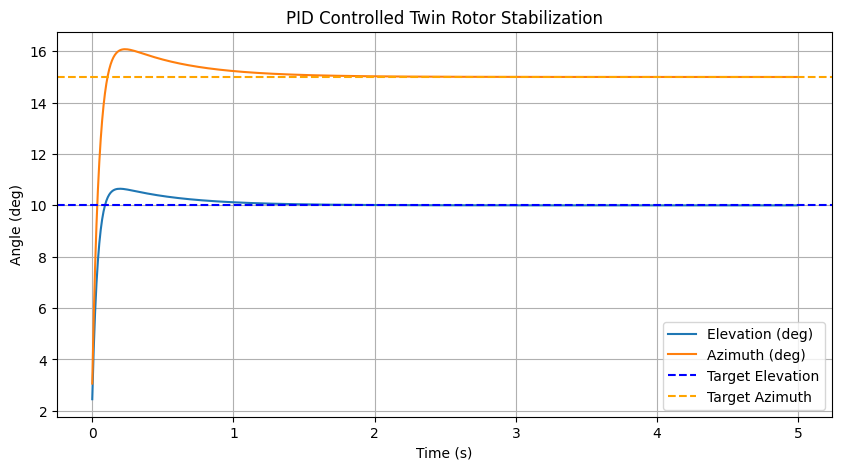

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd, dt):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.dt = dt
        self.integral = 0
        self.previous_error = 0

    def compute(self, error):
        self.integral += error * self.dt
        derivative = (error - self.previous_error) / self.dt
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.previous_error = error
        return output

class TwinRotor:
    def __init__(self, dt=0.01):
        self.dt = dt
        self.angle = np.array([0.0, 0.0])  # [elevation, azimuth]
        self.angular_velocity = np.array([0.0, 0.0])

    def update(self, torque):
        moment_of_inertia = np.array([0.05, 0.05])  # Approximate values
        angular_acceleration = torque / moment_of_inertia
        self.angular_velocity += angular_acceleration * self.dt
        self.angle += self.angular_velocity * self.dt

# Simulation parameters
dt = 0.01  # Time step
time = np.arange(0, 5, dt)  # 5 seconds simulation

# PID controllers for elevation and azimuth
pid_elevation = PIDController(Kp=2.5, Ki=0.15, Kd=1.2, dt=dt)
pid_azimuth = PIDController(Kp=2.0, Ki=0.1, Kd=1.0, dt=dt)

twin_rotor = TwinRotor(dt)

# Desired angles (setpoints)
desired_angle = np.array([10.0, 15.0])  # [elevation, azimuth]

# Data storage
angles = []
for t in time:
    error = desired_angle - twin_rotor.angle
    torque = np.array([
        pid_elevation.compute(error[0]),
        pid_azimuth.compute(error[1])
    ])
    twin_rotor.update(torque)
    angles.append(twin_rotor.angle.copy())

angles = np.array(angles)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, angles[:, 0], label='Elevation (deg)')
plt.plot(time, angles[:, 1], label='Azimuth (deg)')
plt.axhline(desired_angle[0], linestyle='--', color='blue', label='Target Elevation')
plt.axhline(desired_angle[1], linestyle='--', color='orange', label='Target Azimuth')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.title('PID Controlled Twin Rotor Stabilization')
plt.legend()
plt.grid()
plt.show()

#Task#5

 Experimentally verify the stability properties of the controller derived in Task#5 using the experimental setup available in the applied mechanics lab.